# Facial Keypoint Detection Kaggle Competition

Kaggle competition to detect eyes, mouth and nose in grayscaled images.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 1

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
%aimport keypoints
%aimport plots
%aimport data
%aimport pipeline
%aimport submit
%aimport features

%aimport sklearn_model
%aimport tf_model

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

## Load data

In [4]:
data_set = data.read_data_sets(expand=False)

In [5]:
train_set, test_set, validation_set = data_set.train, data_set.test, data_set.validation

In [6]:
def train_predict(name, model):
    p = pipeline.Pipeline(results_dir = 'results-notebook/' + name)
    trained_model = p.train(model, train_set.X, train_set.Y)

    plots.show_imgs(train_set.X, train_set.Y, color = 'magenta', nb = 4)
    plots.show_imgs(train_set.X, p.predict(trained_model, train_set.X), color = 'yellow', nb = 4)
    
    plots.show_imgs(test_set.X, test_set.Y, color = 'blue', nb = 4)
    plots.show_imgs(test_set.X, p.predict(trained_model, test_set.X), color = 'orange', nb = 4)

# Sklearn


## Linear regression

(1369, 9216)


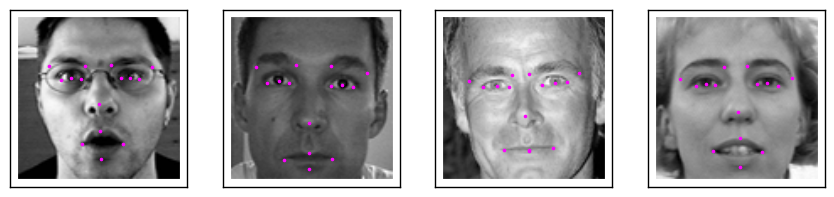

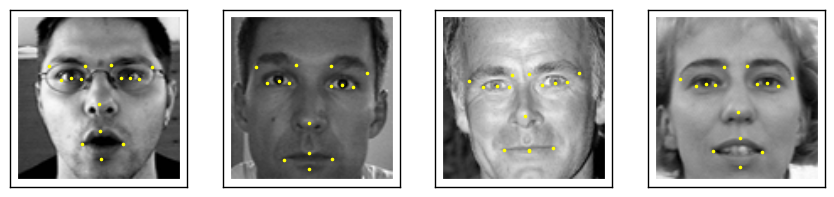

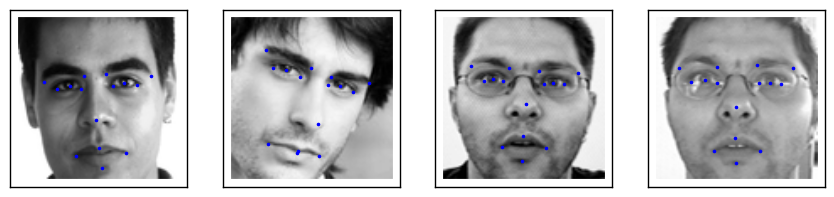

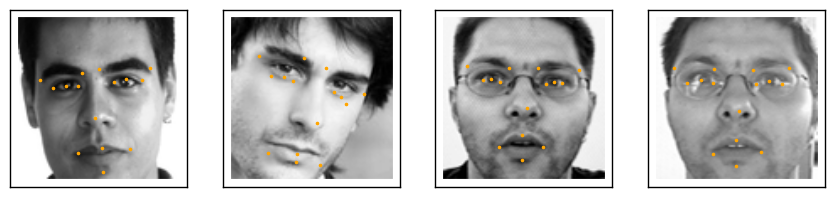

In [7]:
train_predict('sk/linear/regression', sklearn_model.linearRegression())


## Rige regression

(1369, 9216)


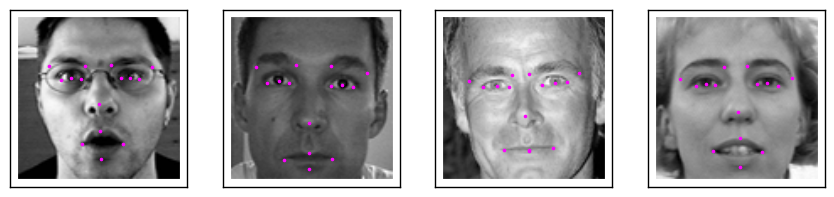

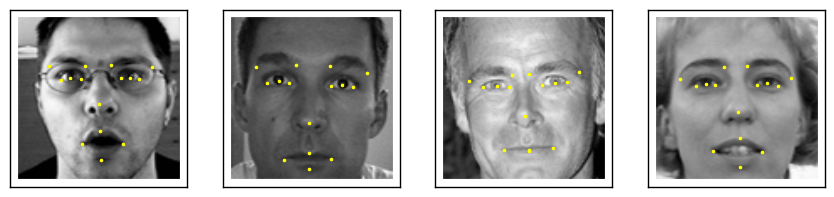

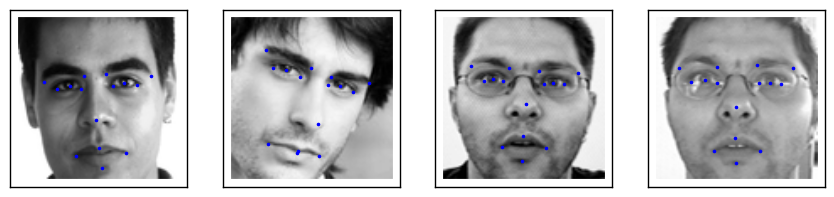

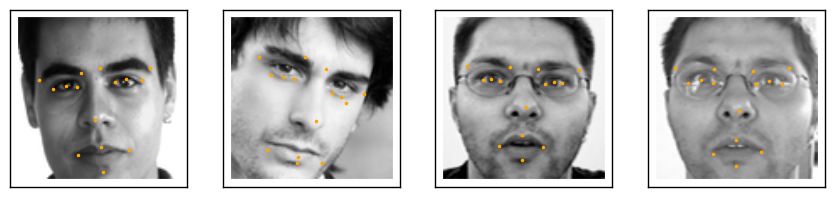

In [8]:
train_predict('sk/linear/rige', sklearn_model.linearRige())

# Tensorflow


## contrib.learn Linear regression

INFO:tensorflow:Using config: {'task': 0, 'save_summary_steps': 100, 'keep_checkpoint_max': 5, 'save_checkpoints_secs': 60, 'tf_config': intra_op_parallelism_threads: 4
inter_op_parallelism_threads: 4
gpu_options {
  per_process_gpu_memory_fraction: 1
}
, 'master': '', 'keep_checkpoint_every_n_hours': 10000, 'tf_random_seed': 42, 'num_ps_replicas': 0}


(1369, 9216)


INFO:tensorflow:Transforming feature_column _RealValuedColumn(column_name='', dimension=9216, default_value=None, dtype=tf.float32)
Instructions for updating:
Please use tf.contrib.framework.load_variable instead
INFO:tensorflow:Create CheckpointSaver
INFO:tensorflow:Step 1: loss = 9.89397
INFO:tensorflow:Saving checkpoints for 1 into /tpm/tf/LinearRegressor1479933925.65/model.ckpt.
INFO:tensorflow:Saving checkpoints for 62 into /tpm/tf/LinearRegressor1479933925.65/model.ckpt.
INFO:tensorflow:Step 101: loss = 5.34542
INFO:tensorflow:Saving checkpoints for 124 into /tpm/tf/LinearRegressor1479933925.65/model.ckpt.
INFO:tensorflow:Saving checkpoints for 181 into /tpm/tf/LinearRegressor1479933925.65/model.ckpt.
INFO:tensorflow:Step 201: loss = 4.44886
INFO:tensorflow:Saving checkpoints for 238 into /tpm/tf/LinearRegressor1479933925.65/model.ckpt.
INFO:tensorflow:Saving checkpoints for 298 into /tpm/tf/LinearRegressor1479933925.65/model.ckpt.
INFO:tensorflow:Step 301: loss = 3.991
INFO:tens

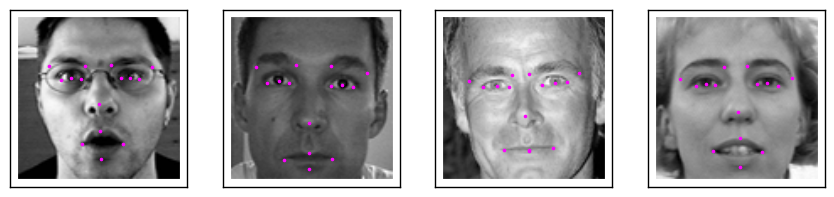

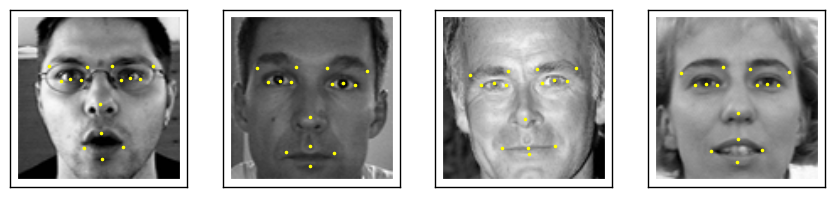

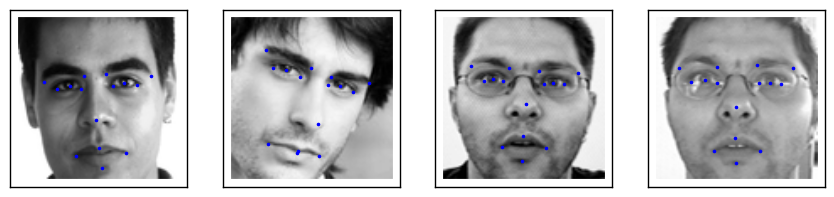

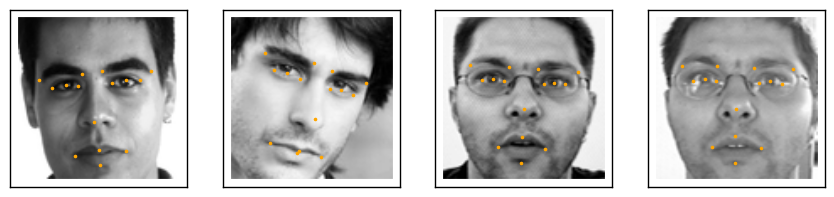

In [11]:
train_predict('sk/tf/regression', tf_model.contrib_learn_LinearRegressor())


## TF vanilla linear regression

(1369, 9216)
(1369, 9216)
Iteration  0 LOSS: 9.43757
Iteration  99 LOSS: 5.0908
Iteration  199 LOSS: 4.18631
Iteration  299 LOSS: 3.72373
Iteration  399 LOSS: 3.42059
Iteration  499 LOSS: 3.19555
Iteration  599 LOSS: 3.01646
Iteration  699 LOSS: 2.86767
Iteration  799 LOSS: 2.74043
Iteration  899 LOSS: 2.62929
Iteration  999 LOSS: 2.53067


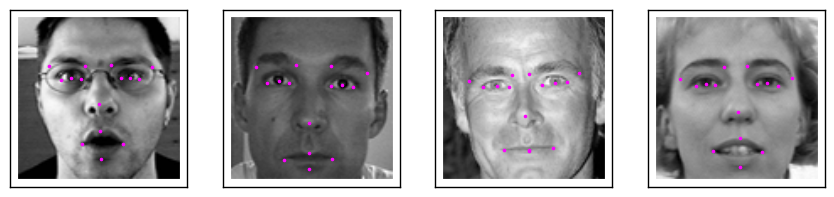

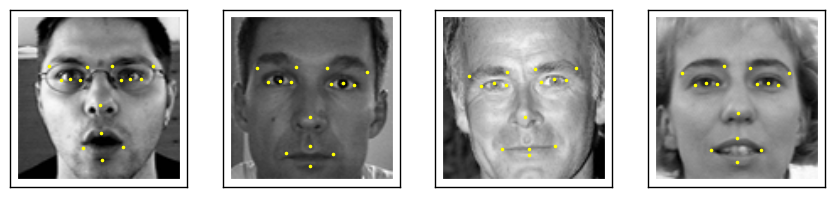

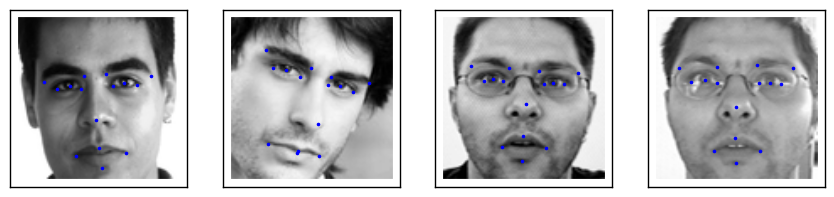

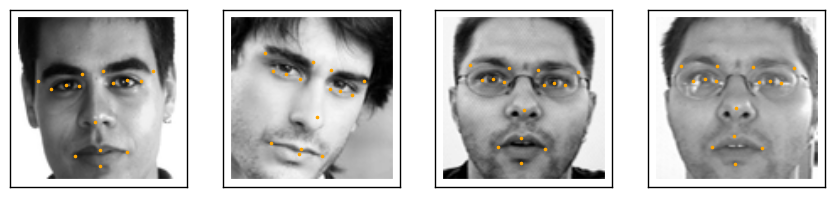

In [10]:
train_predict('sk/tf/vanilla_regression_fit_intercept', tf_model.vanilla_linear_regression())

## TF one hidden layer

In [18]:
train_predict('sk/tf/one_hidden_layer', tf_model.one_hidden_layer())

('learning_rate:', 0.01, ', image_size:', 9216, ', hidden_1:', 100, ', keypoints:', 30)
(1369, 9216)
(1369, 9216)
Iteration  0 LOSS: 4.05172e+30
Iteration  99 LOSS: nan
Iteration  199 LOSS: nan
Iteration  299 LOSS: nan


KeyboardInterrupt: 